In [4]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=fd3997ed79cefd52f5ab5683284a0e46241279406c3165865546c6dccae5dc7f
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [41]:
import re
import traceback
from deepface import DeepFace
import random
random.seed(3)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import matplotlib.image as mpimg
import os
import glob
import pandas as pd
import numpy as np

In [42]:
os.getcwd()

'/content'

In [43]:
img_len=len(glob.glob('/content/Faces/*'))

In [44]:
print(img_len)

10


In [45]:
## Get the gender from the loop
## The functio iterates over the images and uses the deepface age and gender pre trained weights to predict the age and gender.
## Dict is storing Gender,Age and agebucket with key as image name
def calculate_gender(image,img_name):
    name={}
    gender=[]
    age=[]
    agebucket=[]
    try:
        img_arr=cv2.imread(image)
        ## get gender
        response=DeepFace.analyze(img_arr,actions=["gender","age"],enforce_detection=False)
        gender.append(response['gender'])
        age.append(response['age'])
        ## Bucket the age
        if int(age[0])>=13 and int(age[0])<=17:
            agebucket.append('13-17years')
        elif int(age[0])>17 and int(age[0])<=24:
            agebucket.append('18-24years')
        elif int(age[0])>24 and int(age[0])<=34:
            agebucket.append('25-34years')
        elif int(age[0])>34 and int(age[0])<=44:
            agebucket.append('35-44years')
        elif int(age[0])>44 and int(age[0])<=54:
            agebucket.append('45-54years')
        elif int(age[0])>54 and int(age[0])<=64:
            agebucket.append('55-64years')
        elif int(age[0])>64:
            agebucket.append('above 65years')
        else:
            agebucket.append('NA')
        ## store in dictionary
        name[img_name]=(gender[0],age[0],agebucket[0])
    except:
        name[img_name]='NA' ## If the image is not a front facing image
        traceback.print_exc()
    return name

In [46]:
import cv2
from deepface import DeepFace
import glob
import traceback

## Get the gender from the loop
## The function iterates over the images and uses the DeepFace age and gender pre-trained weights to predict the age and gender.
## Dict is storing Gender, Age, and age bucket with key as image name
def calculate_gender(image, img_name):
    name = {}

    try:
        img_arr = cv2.imread(image)

        # Get gender and age using DeepFace
        response = DeepFace.analyze(img_arr, actions=["gender", "age"], enforce_detection=False)

        # Check if response is a list and has at least one item
        if isinstance(response, list) and len(response) > 0:
            gender = response[0]['gender']
            age = response[0]['age']

            # Bucket the age
            if 13 <= age <= 17:
                agebucket = '13-17 years'
            elif 18 <= age <= 24:
                agebucket = '18-24 years'
            elif 25 <= age <= 34:
                agebucket = '25-34 years'
            elif 35 <= age <= 44:
                agebucket = '35-44 years'
            elif 45 <= age <= 54:
                agebucket = '45-54 years'
            elif 55 <= age <= 64:
                agebucket = '55-64 years'
            elif age > 64:
                agebucket = 'above 65 years'
            else:
                agebucket = 'NA'

            # Store in dictionary
            name[img_name] = (gender, age, agebucket)
        else:
            name[img_name] = 'NA'  # Handle case where response is not valid

    except Exception as e:
        name[img_name] = 'NA'  # If the image is not a front-facing image
        traceback.print_exc()  # Print traceback for debugging

    return name

# Iterate through the image to calculate the gender: Pick only available images
img_list = []
image_paths = glob.glob("/content/Faces/*")
img_len = len(image_paths)

for i in range(img_len):  # Loop through available images
    image = image_paths[i]
    print(f"Processing: {image}")

    # Call the calculate_gender function
    result = calculate_gender(image, image.split('/')[-1])  # Using the filename as the img_name
    img_list.append(result)

# Output results
print(img_list)


Processing: /content/Faces/01498.png


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]


Processing: /content/Faces/01247.png


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]


Processing: /content/Faces/01829.png


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]


Processing: /content/Faces/01835.png


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


Processing: /content/Faces/01526.png


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


Processing: /content/Faces/01794.png


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


Processing: /content/Faces/01892.png


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


Processing: /content/Faces/01348.png


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


Processing: /content/Faces/01865.png


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


Processing: /content/Faces/01487.png


Action: age: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

[{'01498.png': ({'Woman': 99.70530271530151, 'Man': 0.2947021508589387}, 29, '25-34 years')}, {'01247.png': ({'Woman': 0.0032312964322045445, 'Man': 99.99676942825317}, 28, '25-34 years')}, {'01829.png': ({'Woman': 0.022415161947719753, 'Man': 99.97758269309998}, 29, '25-34 years')}, {'01835.png': ({'Woman': 12.09658831357956, 'Man': 87.9034161567688}, 28, '25-34 years')}, {'01526.png': ({'Woman': 99.99994039535522, 'Man': 6.0234009424675605e-05}, 31, '25-34 years')}, {'01794.png': ({'Woman': 8.416395758104045e-05, 'Man': 99.99991655349731}, 28, '25-34 years')}, {'01892.png': ({'Woman': 0.01553173060528934, 'Man': 99.98446702957153}, 41, '35-44 years')}, {'01348.png': ({'Woman': 0.044214699300937355, 'Man': 99.95577931404114}, 35, '35-44 years')}, {'01865.png': ({'Woman': 99.8159110546112, 'Man': 0.18408771138638258}, 31, '25-34 years')}, {'01487.png': ({'Woman': 0.5783845204859972, 'Man': 99.42161440849304}, 37, '35-44 years')}]


In [47]:
img_list[:]

[{'01498.png': ({'Woman': 99.70530271530151, 'Man': 0.2947021508589387},
   29,
   '25-34 years')},
 {'01247.png': ({'Woman': 0.0032312964322045445, 'Man': 99.99676942825317},
   28,
   '25-34 years')},
 {'01829.png': ({'Woman': 0.022415161947719753, 'Man': 99.97758269309998},
   29,
   '25-34 years')},
 {'01835.png': ({'Woman': 12.09658831357956, 'Man': 87.9034161567688},
   28,
   '25-34 years')},
 {'01526.png': ({'Woman': 99.99994039535522, 'Man': 6.0234009424675605e-05},
   31,
   '25-34 years')},
 {'01794.png': ({'Woman': 8.416395758104045e-05, 'Man': 99.99991655349731},
   28,
   '25-34 years')},
 {'01892.png': ({'Woman': 0.01553173060528934, 'Man': 99.98446702957153},
   41,
   '35-44 years')},
 {'01348.png': ({'Woman': 0.044214699300937355, 'Man': 99.95577931404114},
   35,
   '35-44 years')},
 {'01865.png': ({'Woman': 99.8159110546112, 'Man': 0.18408771138638258},
   31,
   '25-34 years')},
 {'01487.png': ({'Woman': 0.5783845204859972, 'Man': 99.42161440849304},
   37,
   '35-

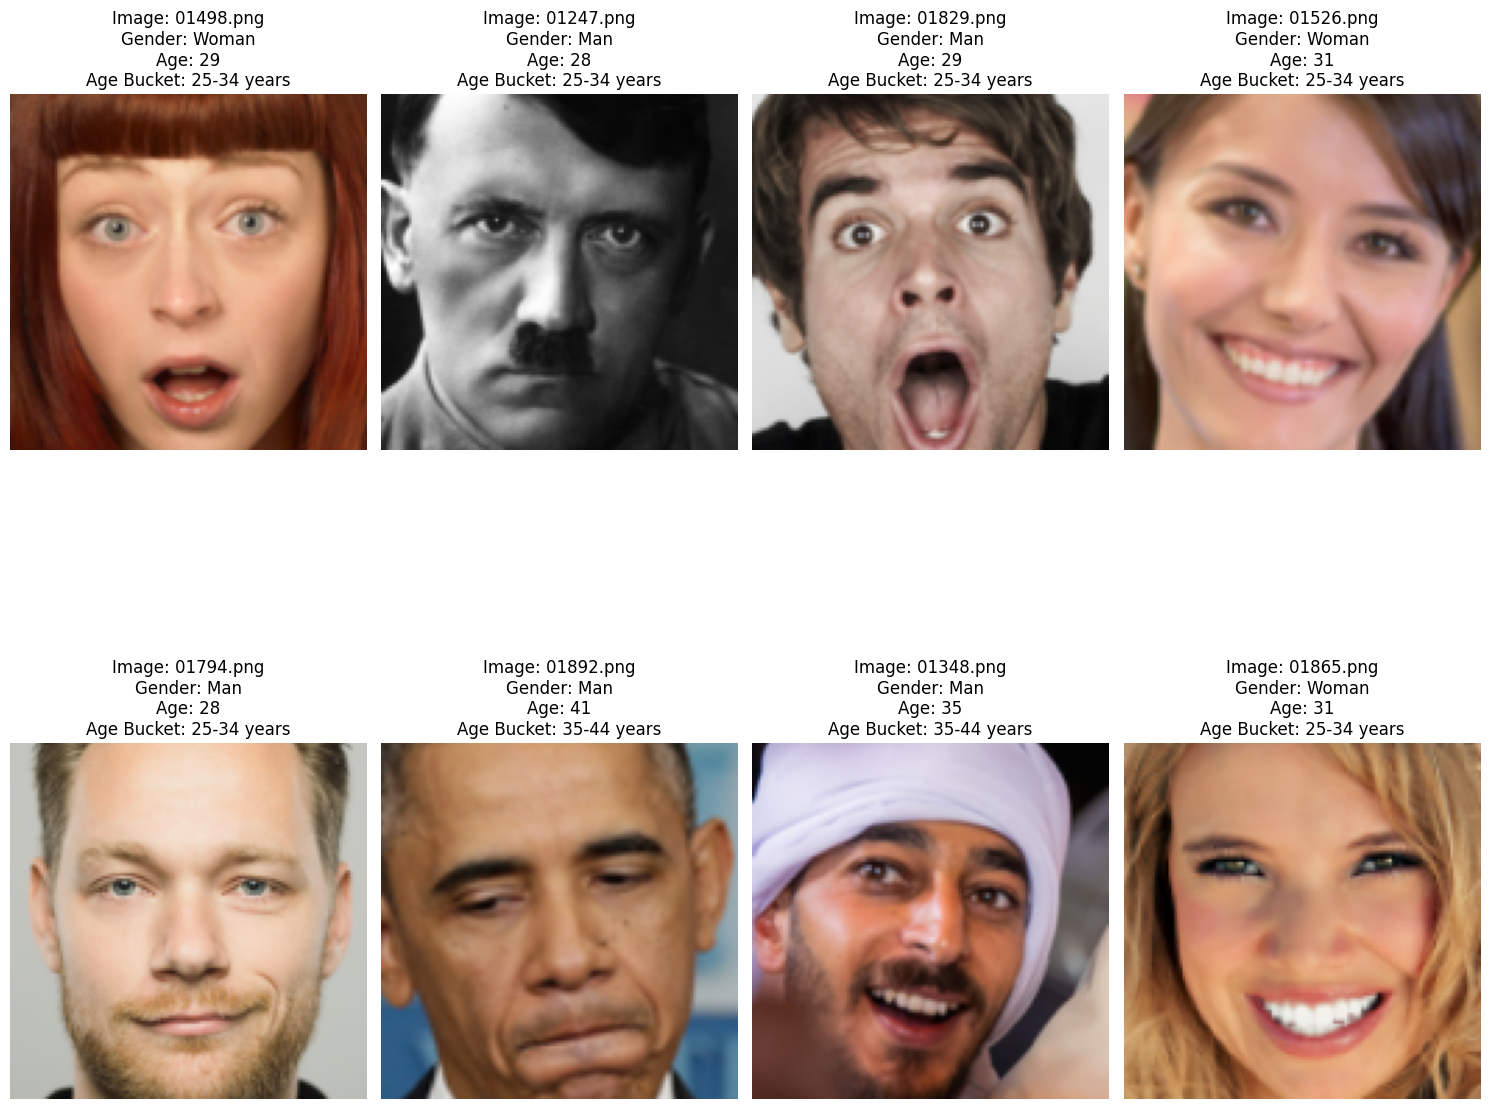

In [50]:
import cv2
import matplotlib.pyplot as plt
import glob

# Create figure
fig = plt.figure(figsize=(15, 15))

# Setting values to rows and column variables
rows = 2
columns = 4

# Get the list of images in the folder
image_paths = glob.glob("/content/Faces/*")

# Number of images to display (up to 8)
num_images = min(len(image_paths), 8)

# Create a flattened version of img_list for easier access
flat_img_list = {list(d.keys())[0]: d[list(d.keys())[0]] for d in img_list}

for i in range(num_images):
    image = image_paths[i]
    img_arr = cv2.imread(image)

    # Adds a subplot at the i+1 position
    fig.add_subplot(rows, columns, i + 1)

    # Showing image
    plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Extract image key (filename without the path)
    image_key = image.split('/')[-1]  # Extract the filename

    # Check if the image key exists in the flattened img_list
    if image_key in flat_img_list:
        gender_probs, age, age_bucket = flat_img_list[image_key]
        gender = "Man" if gender_probs['Man'] > gender_probs['Woman'] else "Woman"
        plt.title(f"Image: {image_key}\nGender: {gender}\nAge: {age}\nAge Bucket: {age_bucket}")
    else:
        plt.title(f"Image: {image_key}\nData not available")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()
